### Dependencies

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# weather_data = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List 

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

646

### Perform API Calls 

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# temp_test = []
# city_test = ['chicago', 'miami', 'london', 'xxx']
# good_cities = []
# for city in city_test:
#     response = requests.get(query_url + city).json()
#     try:
#         temp_test.append(response["main"]["temp"])
#         good_cities.append(city)
#         print(f"{city} found. Temp appending")
#     except KeyError:
#         print(f"no temp for {city}")
# print(response)
# print(temp_test)
# print(good_cities)


In [5]:
ok_cities = []
ok_lat = []
ok_lon = []
ok_maxtemp = []
ok_mintemp = []
ok_humidity = []
ok_clouds = []
ok_wind = []
ok_country = []
ok_date = []

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ok_cities.append(response["name"])
        ok_lat.append(response["coord"]["lat"])
        ok_lon.append(response["coord"]["lon"])
        ok_maxtemp.append(response["main"]["temp_max"])
        ok_mintemp.append(response["main"]["temp_min"])
        ok_humidity.append(response["main"]["humidity"])
        ok_clouds.append(response["clouds"]["all"])
        ok_wind.append(response["wind"]["speed"])
        ok_country.append(response["sys"]["country"])
        ok_date.append(response["dt"])
        print(f"Success! Appending {city}")
           
    except KeyError:
        print(f"Failed! No temp found for {city}")
print(response)

Success! Appending myitkyina
Failed! No temp found for taolanaro
Success! Appending yellowknife
Failed! No temp found for warqla
Success! Appending tasiilaq
Success! Appending busselton
Success! Appending pevek
Success! Appending esna
Success! Appending katsuura
Failed! No temp found for mentok
Success! Appending saldanha
Success! Appending jalu
Success! Appending norman wells
Success! Appending vaini
Success! Appending egvekinot
Success! Appending klaksvik
Success! Appending albany
Failed! No temp found for belushya guba
Success! Appending saskylakh
Success! Appending cidreira
Success! Appending atuona
Success! Appending butaritari
Success! Appending antalaha
Success! Appending cuicatlan
Success! Appending ribeira grande
Success! Appending qaanaaq
Success! Appending bambous virieux
Success! Appending longyearbyen
Success! Appending sao filipe
Success! Appending poum
Success! Appending bluff
Success! Appending nome
Success! Appending kapaa
Success! Appending cape town
Success! Appendin

Success! Appending ushibuka
Success! Appending kitgum
Success! Appending plettenberg bay
Success! Appending chipinge
Success! Appending namatanai
Success! Appending kurilsk
Success! Appending ponta delgada
Failed! No temp found for marcona
Success! Appending koslan
Success! Appending dingle
Success! Appending inhambane
Success! Appending tual
Success! Appending gravdal
Success! Appending kutum
Success! Appending evanston
Success! Appending lakselv
Success! Appending marilandia
Success! Appending chiang khong
Success! Appending birnin kebbi
Success! Appending provideniya
Success! Appending mar del plata
Success! Appending price
Success! Appending praia da vitoria
Failed! No temp found for samusu
Success! Appending jiwani
Success! Appending naryan-mar
Failed! No temp found for amderma
Success! Appending pleasanton
Success! Appending beringovskiy
Success! Appending port-cartier
Success! Appending chernyshevskiy
Success! Appending strezhevoy
Success! Appending hamilton
Success! Appending s

Success! Appending yorosso
Success! Appending chicama
Success! Appending billings
Success! Appending la grande
Success! Appending pospelikha
Success! Appending mackay
Success! Appending sibiti
Success! Appending altona
Success! Appending cunha
Success! Appending steinkjer
Success! Appending montepuez
Success! Appending khani
Success! Appending balykshi
Success! Appending margate
Success! Appending georgetown
Failed! No temp found for stamsund
Success! Appending ossora
Success! Appending nichinan
Success! Appending great yarmouth
Success! Appending uarini
Success! Appending epe
Failed! No temp found for kpagouda
Success! Appending itarema
Success! Appending kaeo
Success! Appending high level
Success! Appending merrill
Success! Appending cabo san lucas
Success! Appending bozeman
Success! Appending aasiaat
Success! Appending kihei
Success! Appending balkanabat
Success! Appending mareeba
Success! Appending vangaindrano
Success! Appending kasongo-lunda
Success! Appending waingapu
Success! A

In [6]:
print(len(ok_cities))
print(len(ok_lat))
print(len(ok_lon))
print(len(ok_maxtemp))
print(len(ok_mintemp))
print(len(ok_humidity))
print(len(ok_clouds))
print(len(ok_wind))
print(len(ok_country))
print(len(ok_date))

587
587
587
587
587
587
587
587
587
587


### Convert Raw Data to DataFrame 

In [7]:
weather_dict = {"City": ok_cities, "Latitude": ok_lat, "Longitude": ok_lon, "Max Temp": ok_maxtemp, 
                "Humidity": ok_humidity, "Cloudiness": ok_clouds, "Wind Speed": ok_wind, 
                "Country": ok_country, "Date": ok_date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Myitkyina,25.3833,97.4000,54.45,59,0,2.86,MM,1611881612
1,Yellowknife,62.4560,-114.3525,-16.06,89,100,4.05,CA,1611881526
2,Tasiilaq,65.6145,-37.6368,22.64,96,100,10.54,GL,1611881481
3,Busselton,-33.6500,115.3333,70.00,73,0,1.01,AU,1611881613
4,Pevek,69.7008,170.3133,-21.06,87,100,0.85,RU,1611881613
...,...,...,...,...,...,...,...,...,...
582,El Tigre,8.8875,-64.2454,77.94,64,40,9.60,VE,1611881409
583,Beira,-19.8436,34.8389,80.60,89,20,4.61,MZ,1611881682
584,Kuytun,54.3419,101.5036,-29.96,83,100,3.74,RU,1611881682
585,Jūybār,36.6412,52.9124,53.76,46,0,4.23,IR,1611881682


### Inspect data and remove cities where the humidty is > 100%

In [8]:
low_hum = pd.DataFrame(weather_df[weather_df["Humidity"]< 100])
low_hum

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Myitkyina,25.3833,97.4000,54.45,59,0,2.86,MM,1611881612
1,Yellowknife,62.4560,-114.3525,-16.06,89,100,4.05,CA,1611881526
2,Tasiilaq,65.6145,-37.6368,22.64,96,100,10.54,GL,1611881481
3,Busselton,-33.6500,115.3333,70.00,73,0,1.01,AU,1611881613
4,Pevek,69.7008,170.3133,-21.06,87,100,0.85,RU,1611881613
...,...,...,...,...,...,...,...,...,...
582,El Tigre,8.8875,-64.2454,77.94,64,40,9.60,VE,1611881409
583,Beira,-19.8436,34.8389,80.60,89,20,4.61,MZ,1611881682
584,Kuytun,54.3419,101.5036,-29.96,83,100,3.74,RU,1611881682
585,Jūybār,36.6412,52.9124,53.76,46,0,4.23,IR,1611881682


In [44]:
date = dt.date.today().strftime("%m/%d/%y")
date

'01/28/21'

## Plotting the Data 

### Latitude vs. Temperature Plot 

Text(0, 0.5, 'Temperature')

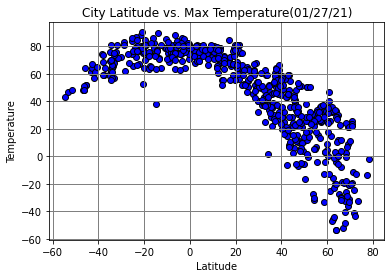

In [34]:
plot_lat = low_hum['Latitude']
plot_temp = low_hum["Max Temp"]

plt.scatter(plot_lat, plot_temp, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature")


### Latitude vs. Humidty Plot

Text(0, 0.5, 'Humidity')

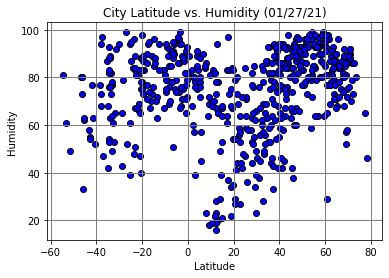

In [35]:
plot_lat = low_hum['Latitude']
plot_humidity = low_hum["Humidity"]

plt.scatter(plot_lat, plot_humidity, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=1)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Humidity')

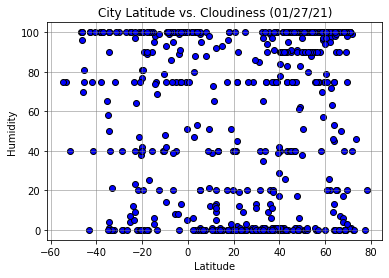

In [36]:
plot_lat = low_hum['Latitude']
plot_cloud = low_hum["Cloudiness"]

plt.scatter(plot_lat, plot_cloud, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

###  Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Humidity')

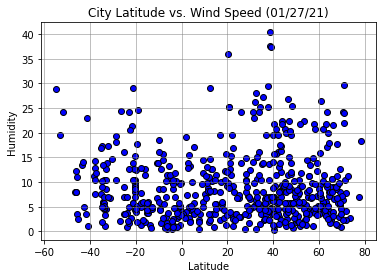

In [37]:
plot_lat = low_hum['Latitude']
plot_wind = low_hum["Wind Speed"]

plt.scatter(plot_lat, plot_wind, marker="o", facecolors = "blue", edgecolors="black", 
            alpha=.99)

plt.grid(color="grey", linestyle="-", linewidth=.5)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

## Linear Regression

In [13]:
north_hem = pd.DataFrame(low_hum[low_hum["Latitude"]> 0])
north_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Myitkyina,25.3833,97.4000,54.45,59,0,2.86,MM,1611881612
1,Yellowknife,62.4560,-114.3525,-16.06,89,100,4.05,CA,1611881526
2,Tasiilaq,65.6145,-37.6368,22.64,96,100,10.54,GL,1611881481
4,Pevek,69.7008,170.3133,-21.06,87,100,0.85,RU,1611881613
5,Esna,25.2934,32.5540,50.00,71,0,6.78,EG,1611881613


In [14]:
north_lat = north_hem["Latitude"]
north_maxtemp = north_hem["Max Temp"]
north_humid = north_hem["Humidity"]
north_cloud = north_hem["Cloudiness"]
north_wind = north_hem["Wind Speed"]

In [15]:
south_hem = pd.DataFrame(low_hum[low_hum["Latitude"]< 0])
south_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Busselton,-33.6500,115.3333,70.00,73,0,1.01,AU,1611881613
7,Saldanha,-33.0117,17.9442,57.20,77,0,4.61,ZA,1611881613
10,Vaini,-21.2000,-175.2000,80.33,83,100,29.08,TO,1611881614
15,Cidreira,-30.1811,-50.2056,72.41,94,100,14.76,BR,1611881614
16,Atuona,-9.8000,-139.0333,78.94,74,14,18.59,PF,1611881614


In [16]:
south_lat = south_hem["Latitude"]
south_maxtemp = south_hem["Max Temp"]
south_humid = south_hem["Humidity"]
south_cloud = south_hem["Cloudiness"]
south_wind = south_hem["Wind Speed"]

### Northern Hemisphere: Max Temp vs. Latitude Linear Regression 

The r-value is -0.84


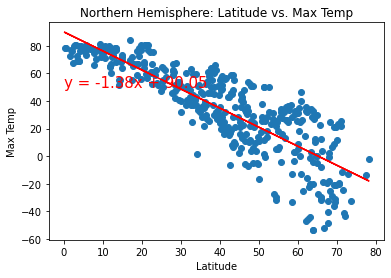

In [17]:
correlation = st.pearsonr(north_lat, north_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_maxtemp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_maxtemp)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Max Temp vs. Latitude Linear Regression 

The r-value is 0.59


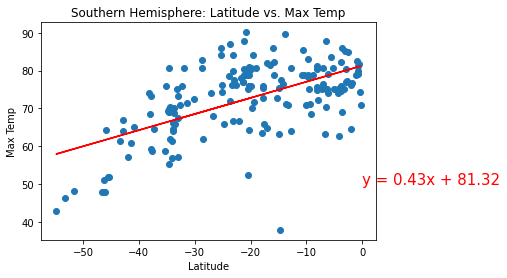

In [18]:
correlation = st.pearsonr(south_lat, south_maxtemp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_maxtemp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_maxtemp)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The r-value is 0.42


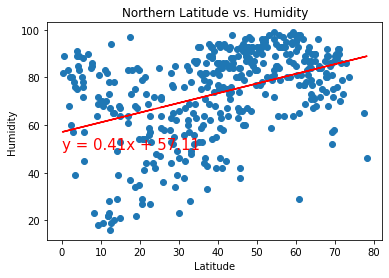

In [19]:
correlation = st.pearsonr(north_lat, north_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humid)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Humidty (%) vs. Latitude Linear Regression 

The r-value is 0.37


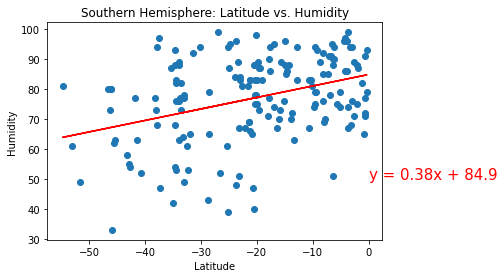

In [20]:
correlation = st.pearsonr(south_lat, south_humid)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hemisphere: Latitude vs. Humidity")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.28


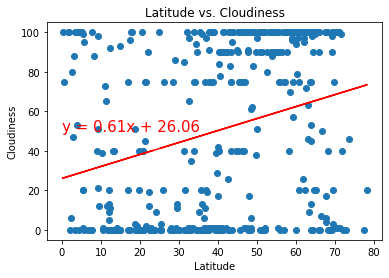

In [21]:
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.plot(north_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression 

The r-value is 0.17


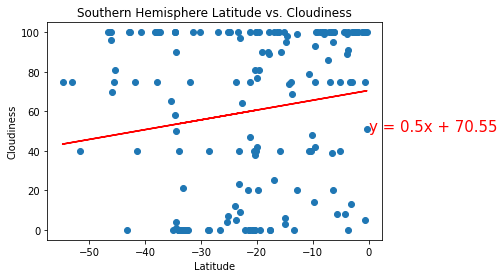

In [22]:
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.plot(south_lat,regress_values, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hemisphere Latitude vs. Cloudiness")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is 0.02


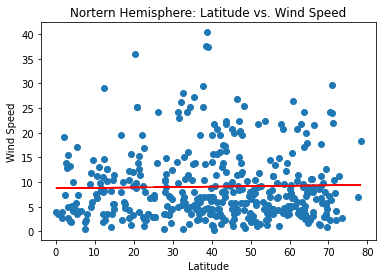

In [23]:
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Nortern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()

### Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression 

The r-value is -0.31


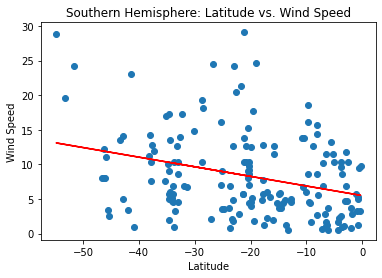

<Figure size 432x288 with 0 Axes>

In [27]:
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values, "r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
print(f"The r-value is {round(correlation[0],2)}")
plt.show()
plt.savefig("output_data/south_wind.jpg", dpi=300)

In [25]:
weather_df.to_csv("output_data/cities2.csv", index=False, header=True)